<a href="https://colab.research.google.com/github/Adriel-Vieira/m-todos-num-ricos-e-aplicados/blob/main/Oficial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atividade 3

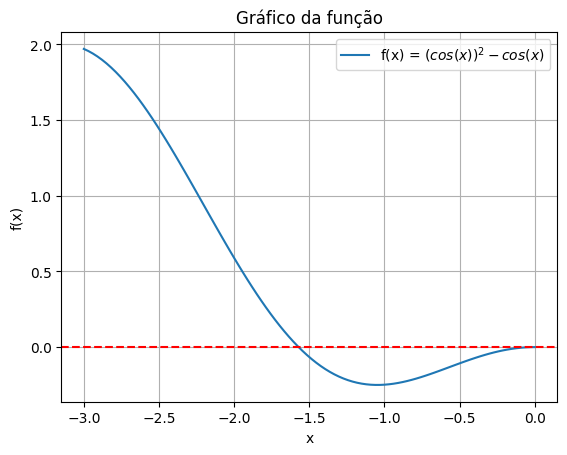

Tabela de iterações - Bisseção:
Iteração | a       | b       | c       | f(c)
       0 | -3.0000 | 0.0000  | -1.5000 | -0.0657
       1 | -3.0000 | -1.5000 | -2.2500 | 1.0228 
       2 | -2.2500 | -1.5000 | -1.8750 | 0.3893 
       3 | -1.8750 | -1.5000 | -1.6875 | 0.1300 
       4 | -1.6875 | -1.5000 | -1.5938 | 0.0235 
       5 | -1.5938 | -1.5000 | -1.5469 | -0.0233
       6 | -1.5938 | -1.5469 | -1.5703 | -0.0005
       7 | -1.5938 | -1.5703 | -1.5820 | 0.0114 
       8 | -1.5820 | -1.5703 | -1.5762 | 0.0054 
       9 | -1.5762 | -1.5703 | -1.5732 | 0.0025 
      10 | -1.5732 | -1.5703 | -1.5718 | 0.0010 
      11 | -1.5718 | -1.5703 | -1.5710 | 0.0002 
      12 | -1.5710 | -1.5703 | -1.5707 | -0.0001
      13 | -1.5710 | -1.5707 | -1.5709 | 0.0001 
      14 | -1.5709 | -1.5707 | -1.5708 | -0.0000
      15 | -1.5709 | -1.5708 | -1.5708 | 0.0000 
      16 | -1.5708 | -1.5708 | -1.5708 | -0.0000
      17 | -1.5708 | -1.5708 | -1.5708 | 0.0000 
      18 | -1.5708 | -1.5708 | -1.5708 |

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (np.cos(x))**2 - np.cos(x)

def f_prime(x):
    return -2 * np.cos(x) * np.sin(x) + np.sin(x)

def bissecao(a, b, tol, max_iter):
    iteracoes = []
    for i in range(max_iter):
        c = (a + b) / 2
        iteracoes.append((i, a, b, c, f(c)))
        if f(c) == 0 or (b - a) / 2 < tol:
            return c, iteracoes
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return c, iteracoes

def newton_raphson(x0, tol, max_iter):
    iteracoes = []
    for i in range(max_iter):
        x1 = x0 - f(x0) / f_prime(x0)
        iteracoes.append((i, x0, f(x0)))
        if abs(x1 - x0) < tol:
            return x1, iteracoes
        x0 = x1
    return x0, iteracoes

a, b = -3, 0
tol = 1e-5
max_iter = 100
x0 = -1.5

raiz_bissecao, it_bissecao = bissecao(a, b, tol, max_iter)
raiz_newton, it_newton = newton_raphson(x0, tol, max_iter)

x = np.linspace(-3, 0, 100)
plt.plot(x, f(x), label='f(x) = $(cos(x))^2 - cos(x)$')
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico da função')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

print("Tabela de iterações - Bisseção:")
print("Iteração | a       | b       | c       | f(c)")
for it in it_bissecao:
    print(f"{it[0]:>8} | {it[1]:<7.4f} | {it[2]:<7.4f} | {it[3]:<7.4f} | {it[4]:<7.4f}")

print("\nTabela de iterações - Newton-Raphson:")
print("Iteração | x       | f(x)")
for it in it_newton:
    print(f"{it[0]:>8} | {it[1]:<7.4f} | {it[2]:<7.4f}")


Atividade 4

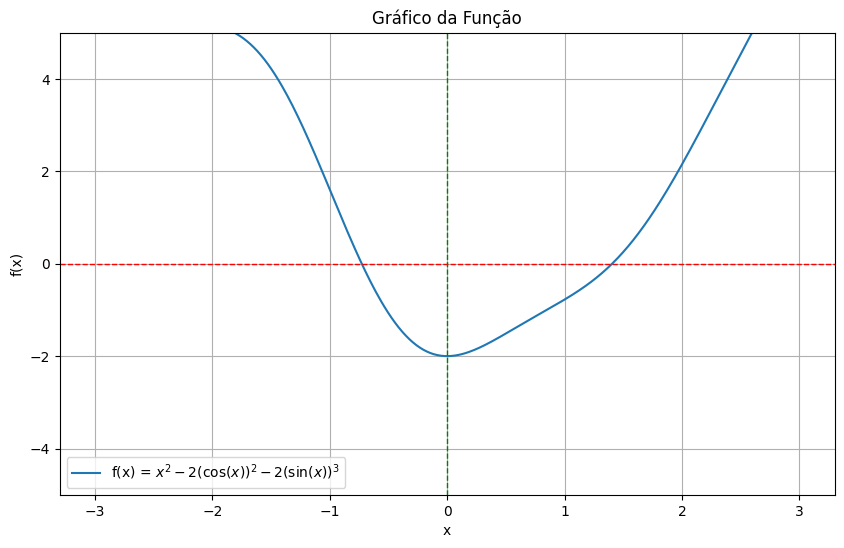

Raiz encontrada no intervalo (-3, -2):
Iteração | a         | b         | c         | f(c)
---------------------------------------------------
0         | -1.000000 | 0.000000  | -0.500000 | -1.069911
1         | -1.000000 | -0.500000 | -0.750000 | 0.125184 
2         | -0.750000 | -0.500000 | -0.625000 | -0.524094
3         | -0.750000 | -0.625000 | -0.687500 | -0.210746
4         | -0.750000 | -0.687500 | -0.718750 | -0.045365
5         | -0.750000 | -0.718750 | -0.734375 | 0.039296 
6         | -0.734375 | -0.718750 | -0.726562 | -0.003192
7         | -0.734375 | -0.726562 | -0.730469 | 0.018013 
8         | -0.730469 | -0.726562 | -0.728516 | 0.007401 
9         | -0.728516 | -0.726562 | -0.727539 | 0.002102 
10        | -0.727539 | -0.726562 | -0.727051 | -0.000546
11        | -0.727539 | -0.727051 | -0.727295 | 0.000778 
12        | -0.727295 | -0.727051 | -0.727173 | 0.000116 
13        | -0.727173 | -0.727051 | -0.727112 | -0.000215
14        | -0.727173 | -0.727112 | -0.727142

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 2*(np.cos(x)**2) - 2*(np.sin(x)**3)

def bissecao(a, b, tol=1e-5, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError()

    iter_data = []
    for i in range(max_iter):
        c = (a + b) / 2
        iter_data.append((i, a, b, c, f(c)))

        if abs(f(c)) < tol or (b - a) / 2 < tol:
            return c, iter_data

        if f(c) * f(a) < 0:
            b = c
        else:
            a = c

    return (a + b) / 2, iter_data

intervals = [(-3, -2), (-2, -1), (-1, 0), (0, 1), (1, 2), (2, 3)]
roots = []
iteration_data = []

for interval in intervals:
    try:
        root, it_data = bissecao(interval[0], interval[1])
        roots.append(root)
        iteration_data.append(it_data)
    except ValueError as e:
        print(e)

x_vals = np.linspace(-3, 3, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = $x^2 - 2(\cos(x))^2 - 2(\sin(x))^3$')
plt.axhline(0, color='red', linestyle='--', lw=1)
plt.axvline(0, color='green', linestyle='--', lw=1)
plt.title('Gráfico da Função')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.ylim(-5, 5)
plt.show()

for i, data in enumerate(iteration_data):
    print(f"Raiz encontrada no intervalo {intervals[i]}:")
    print("Iteração | a         | b         | c         | f(c)")
    print("---------------------------------------------------")
    for row in data:
        print(f"{row[0]:<9} | {row[1]:<9.6f} | {row[2]:<9.6f} | {row[3]:<9.6f} | {row[4]:<9.6f}")
    print("\n")




Atividade 5

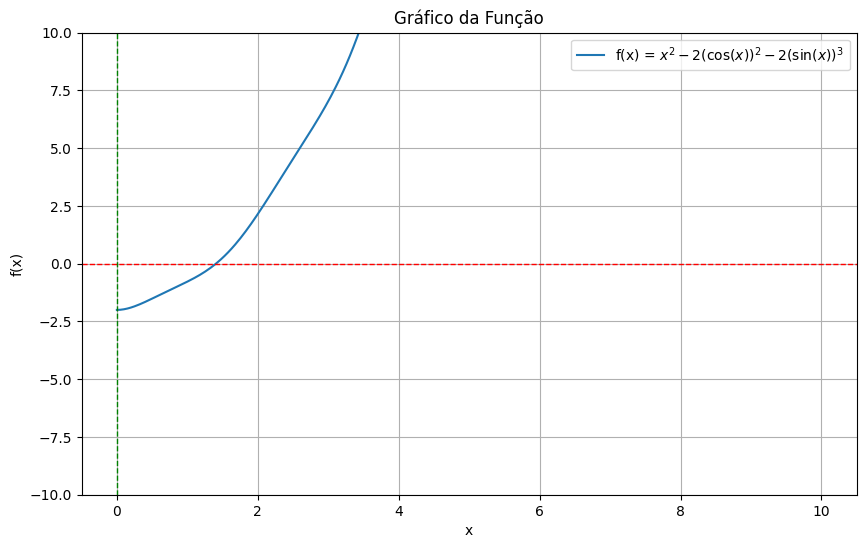

Raiz encontrada a partir do chute inicial 5:
Iteração | x           | f(x)
--------------------------------
0         | 1.379087    | -0.062809  
1         | 1.405207    | 0.001221   
2         | 1.404718    | 0.000000   
3         | 1.404718    | 0.000000   


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 2*(np.cos(x)**2) - 2*(np.sin(x)**3)

def f_prime(x):
    return 2*x + 4*np.cos(x)*np.sin(x) - 6*(np.sin(x)**2)*np.cos(x)

def newton_raphson(x0, tol=1e-5, max_iter=100):
    x = x0
    iter_data = []

    for i in range(max_iter):
        x_new = x - f(x) / f_prime(x)
        iter_data.append((i, x_new, f(x_new)))

        if abs(x_new - x) < tol:
            break

        x = x_new

    return x_new, iter_data

initial_guess = 5
root, iteration_data = newton_raphson(initial_guess)

x_vals = np.linspace(0, 10, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = $x^2 - 2(\cos(x))^2 - 2(\sin(x))^3$')
plt.axhline(0, color='red', linestyle='--', lw=1)
plt.axvline(0, color='green', linestyle='--', lw=1)
plt.title('Gráfico da Função')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.ylim(-10, 10)
plt.show()

print("Raiz encontrada a partir do chute inicial 5:")
print("Iteração | x           | f(x)")
print("--------------------------------")
for row in iteration_data:
    print(f"{row[0]:<9} | {row[1]:<11.6f} | {row[2]:<11.6f}")
